**Neural Network Regression with TensorFlow**

**What is Regression?**

Regression is a type of problem where we try to predict a number. For example:

* Predicting the price of a house based on its features (like the number of rooms and size)
* Predicting the location of an object in an image
* Predicting the cost of health insurance based on a person's age, sex, and other characteristics

In this lesson, we'll learn how to use a type of machine learning called neural networks to solve these kinds of problems.

**What We'll Cover**

We'll go through the following steps using TensorFlow:

* Building a neural network to predict a number
* Understanding the shape of our data (inputs and outputs)
* Creating a simple dataset to practice with
* Training our model to find patterns in the data
* Evaluating how well our model is working
* Visualizing our results to understand them better
* Saving our model so we can use it later

Don't worry if these terms are unfamiliar - we'll go through each step together!

**How to Get the Most Out of This Lesson**

The best way to learn is by doing. Instead of just reading through the code, try writing it yourself in a new notebook. Experiment with different values and see what happens. Don't be afraid to make mistakes - they're an important part of the learning process!

In [39]:
import tensorflow as tf
print(tf.__version__)

2.15.0


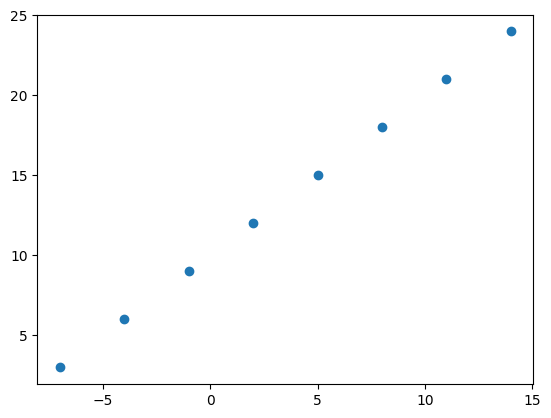

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [41]:
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Understanding Input and Output Shapes**

When working with neural networks, it's crucial to understand the shapes of your input and output data.

**Input Shape**: This refers to the shape of the data that you feed into the model.

**Output Shape**: This is the shape of the data that you want the model to produce.

These shapes can vary depending on the specific problem you're trying to solve.

Neural networks work with numbers, which are typically represented as tensors or arrays. In our previous example, we used NumPy arrays to create data, but we could have also used tensors.

In [42]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [43]:
house_info.shape

TensorShape([3])

In [44]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

**Wait, What? No Shape?**

You might be thinking, "How can our inputs and outputs not have a shape?"

But that's not exactly what's going on. The thing is, no matter what kind of data we feed into our model, it's always going to be in the form of a tensor.

In our case, because we're working with a simple dataset of just two small lists of numbers, our tensors are actually a special type called rank 0 tensors, or scalars.

In [45]:
# Turn our Numpy array into tensors
x = tf.constant(X)
y = tf.constant(y)

**Building a Neural Network with TensorFlow**

Now that we have our data and understand the input and output shapes, let's build a neural network to model it.

In TensorFlow, there are three main steps to create and train a model:

1. **Create a Model**: Build the layers of a neural network using the Functional or Sequential API, or import a pre-built model (transfer learning).
2. **Compile a Model**: Define how to measure the model's performance (loss and metrics) and how to improve it (optimizer).
3. **Fit a Model**: Let the model find patterns in the data (how `X` relates to `y`).

Let's use the Keras Sequential API to build a model for our regression data and then step through each process.

**Important Note:** If you're using TensorFlow 2.7.0 or later, the `fit()` function no longer automatically upscales input data. To fix this, you need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`. In our case, this means using `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)` instead of `model.fit(X, y, epochs=5)`.

In [46]:
# Set random seed
tf.random.set_seed(42)

#1. Create a mdoel using sequential model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.MAE # Or metrics=["mae"]
              )
#3. Fit the model    tf.expand_dims(X, axis=-1)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 746ms/step - loss: 12.2670 - mean_absolute_error: 12.2670
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 12.1345 - mean_absolute_error: 12.1345
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 12.0020 - mean_absolute_error: 12.0020
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.8695 - mean_absolute_error: 11.8695
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 11.7370 - mean_absolute_error: 11.7370


In [47]:
model.predict([17])

1/1 [==============================] - 0s 146ms/step


array([[9.01404]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [48]:
# Let's rebuild our model
# Set random seed
tf.random.set_seed(42)

#1. Create a mdoel using sequential model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics = tf.keras.metrics.MAE # Or metrics=["mae"]
              )
#3. Fit the model    tf.expand_dims(X, axis=-1)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.1453 - mean_absolute_error: 13.1453
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4255 - mean_absolute_error: 12.4255
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.7056 - mean_absolute_error: 11.7056
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9844 - mean_absolute_error: 10.9844
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2607 - mean_absolute_error: 10.2607
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 9.5327 - mean_absolute_error: 9.5327
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 8.7987 - mean_absolute_error: 8.7987
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0567 - mean_absolute_error: 8.0567
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.3419 - mean_absolute_error: 7.3419
Epoch 10/10

In [49]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 189ms/step


array([[28.686407]], dtype=float32)

In [50]:
# Let's rebuild our model
# Set random seed
tf.random.set_seed(42)

#1. Create a mdoel using sequential model
model = tf.keras.Sequential([
          tf.keras.layers.Dense(50, activation=None),
          tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = ["mae"],
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = tf.keras.metrics.MAE # Or metrics=["mae"]
              )
#3. Fit the model    tf.expand_dims(X, axis=-1)
model.fit(tf.expand_dims(x, axis=-1),y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 936ms/step - loss: 12.6201 - mean_absolute_error: 12.6201
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.9313 - mean_absolute_error: 11.9313
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 11.2265 - mean_absolute_error: 11.2265
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5041 - mean_absolute_error: 10.5041
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 9.7631 - mean_absolute_error: 9.7631
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0024 - mean_absolute_error: 9.0024
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2204 - mean_absolute_error: 8.2204
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4156 - mean_absolute_error: 7.4156
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8163 - mean_absolute_error: 6.8163
Epoch 10/1

In [51]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 93ms/step


array([[26.511677]], dtype=float32)

In [52]:
# Remind ourselves of what X and y are
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [53]:
#Make a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [54]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

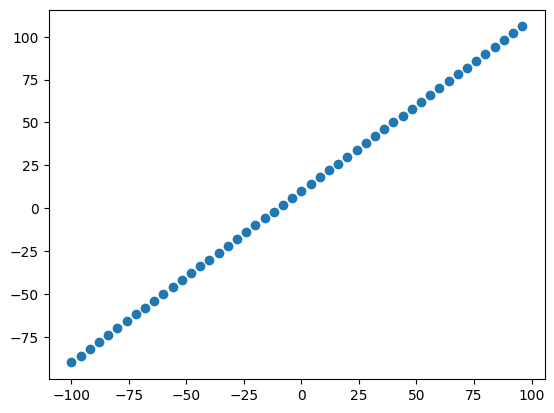

In [55]:
#visualize the data
plt.scatter(X,y)

In [56]:
len(X)

50

In [57]:
# from sklearn.model_selection import train_test_split
# xtr, ytr, xte, yte = train_test_split(X,y, test_size=0.2)

# remember that :
#Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices for this function,but we have got array([ 5, 28, 13, 49, 32, 44, 38,  6, 46, 30, 21,  2,  8, 31, 34, 10,  4,
#       27, 22, 16, 48, 35, 17,  1, 20, 36, 29, 37, 41, 26, 42, 47,  9, 39,
#       14, 15, 33,  0, 45, 11])


So, let's do this manually.

In [58]:
xtr =  X[:40]
ytr = y[:40]
xte = X[40:]
yte = y[40:]
len(xtr), len(xte),len(ytr),  len(yte)

(40, 10, 40, 10)

## Visualizing the data

Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

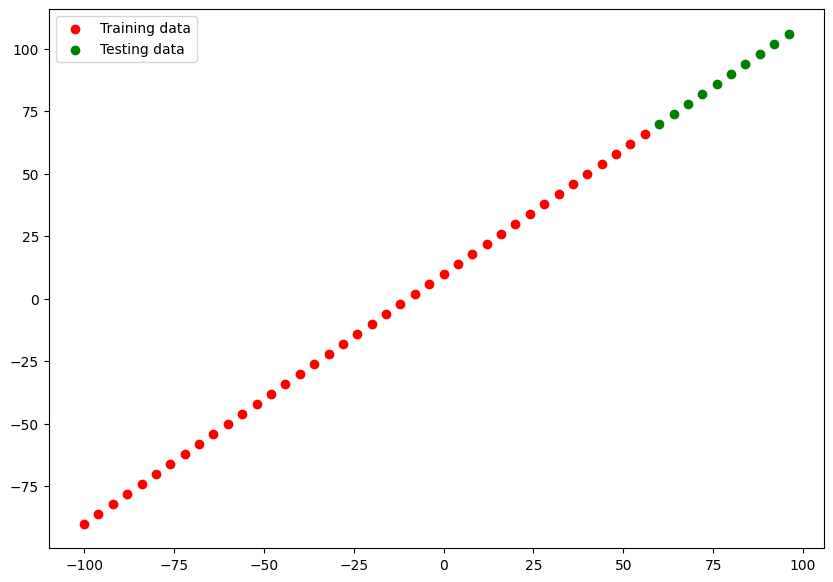

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(xtr,ytr, c="r", label= "Training data")
plt.scatter(xte,yte, c="g", label ="Testing data")
plt.legend();

Beautiful! Any time you can visualize your data, your model, your anything, it's a good idea.

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

Time to build a model. We'll make the exact same one from before (the one we trained for longer).

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

In [61]:
# # Doesn't work (model not fit/built)
# model.summary()

Ahh, the cell above errors because we haven't fit or built our model.

We also haven't told it what input shape it should be expecting.

Remember above, how we discussed the input shape was just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tries to figure it out automatically).

In [62]:
from os import name
from ast import Name
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # define the input_shape to our model
  tf.keras.layers.Dense(1, name= "output_layer"),

  ], name="prici")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [63]:
model.summary()

Model: "prici"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
**Parameters**- Weight & bias.

* **Total params** - total number of parameters in the model. **2 X (number of input in Desnse layer)**

* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).


For now, all you need to think about these parameters is that their learnable patterns in the data.


In [64]:
# Fit the model
model.fit(xtr, ytr,  epochs=100, verbose=0)

In [65]:
model.summary()

Model: "prici"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


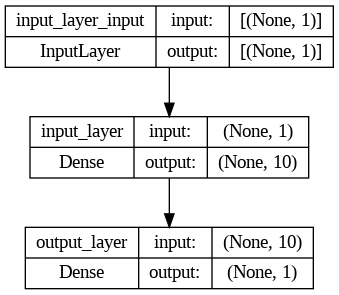

In [66]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

First, we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [67]:
# Make predictions
y_preds = model.predict(xte)

1/1 [==============================] - 0s 59ms/step


In [68]:
y_preds

array([[ 91.26174 ],
       [ 97.220985],
       [103.18021 ],
       [109.13946 ],
       [115.09868 ],
       [121.057915],
       [127.01714 ],
       [132.9764  ],
       [138.93561 ],
       [144.89487 ]], dtype=float32)

Okay, we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

In [69]:
# creating a plotting function
# pltp - plot predictions
def pltp(train_data= xtr, train_labels=ytr, test_data = xte, test_label = yte, predictions = y_preds):
  """
  Plot training data, test data and compared prediction from truth output/labe;
  """
  plt.figure(figsize=(10,7))
  # plotting data
  plt.scatter(train_data, train_labels, c = "g", label="Training data")
  plt.scatter(test_data, test_label, c = "b", label="Testing data")
  plt.scatter(test_data, predictions, c = "r", label="Preds")
  plt.legend();

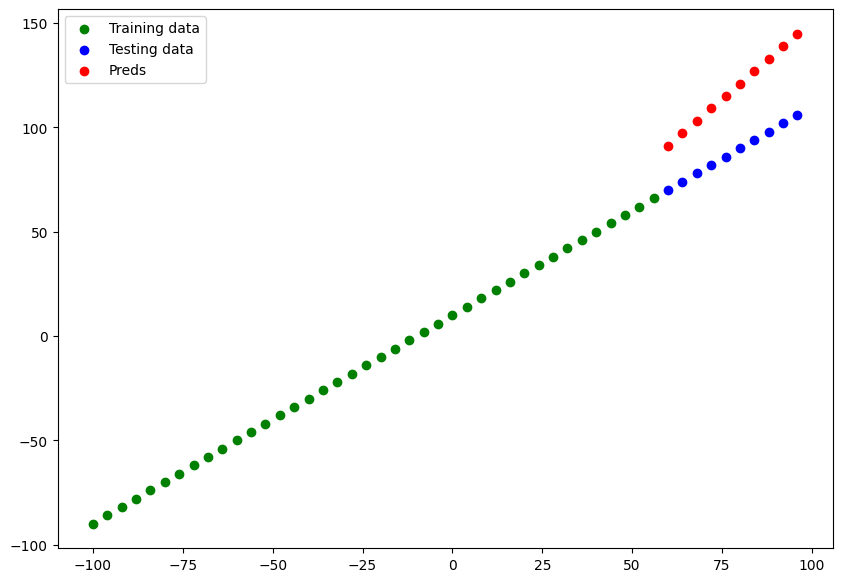

In [70]:
pltp()

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [71]:
# Evaluate the model on the test set
model.evaluate(xte, yte)

1/1 [==============================] - 0s 148ms/step - loss: 30.0783 - mae: 30.0783


[30.078298568725586, 30.078298568725586]

In our case, since we used MAE for the loss function as well as MAE for the metrics, `model.evaulate()` returns them both.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the ground truth labels.

In [72]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=yte,
                                     y_pred=tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.252348, 12.088394, 15.744165, 21.139458, 27.098679, 33.057915,
       39.017143, 44.976395, 50.935608, 56.894867], dtype=float32)>

In [73]:
tf.argmax(mae)

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [74]:
yte

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Huh? That's strange, MAE should be a single output.
Instead, we get 10 values.

This is because our `y_test` and `y_preds` tensors are different shapes.

In [75]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [76]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 91.26174 ],
       [ 97.220985],
       [103.18021 ],
       [109.13946 ],
       [115.09868 ],
       [121.057915],
       [127.01714 ],
       [132.9764  ],
       [138.93561 ],
       [144.89487 ]], dtype=float32)>

In [77]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 91.26174 ,  97.220985, 103.18021 , 109.13946 , 115.09868 ,
       121.057915, 127.01714 , 132.9764  , 138.93561 , 144.89487 ],
      dtype=float32)>

In [78]:
# Calculate MSE
mae = tf.metrics.mean_absolute_error(y_true=yte, y_pred=tf.squeeze(y_preds))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=30.078299>

In [79]:
# Calculate MSE
mse = tf.metrics.mean_squared_error(y_true=yte, y_pred=tf.squeeze(y_preds))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=936.37256>

In [80]:
#Make a function to use mae and MSE

def mae(yte, y_preds):
  return tf.metrics.mean_absolute_error(yte,tf.squeeze( y_preds))

def mse(yte, y_preds):
  return tf.metrics.mean_squared_error(yte, tf.squeeze(y_preds))


## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [81]:
xtr

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

In [82]:
tf.expand_dims(xtr, axis =-1)

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [83]:
tf.random.set_seed(42)

# Create a model
model1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),

    ]
)

#2 Compile the model

model1.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss= ["mae"],
    metrics = ["mae"]
)

# 3. Fit the model
model1.fit(tf.expand_dims(xtr, axis =-1),ytr, epochs=100, verbose=0)


In [84]:
# Make and plot predictions for our model1
model1.predict

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x78a07cfde3e0>>

1/1 [==============================] - 0s 53ms/step


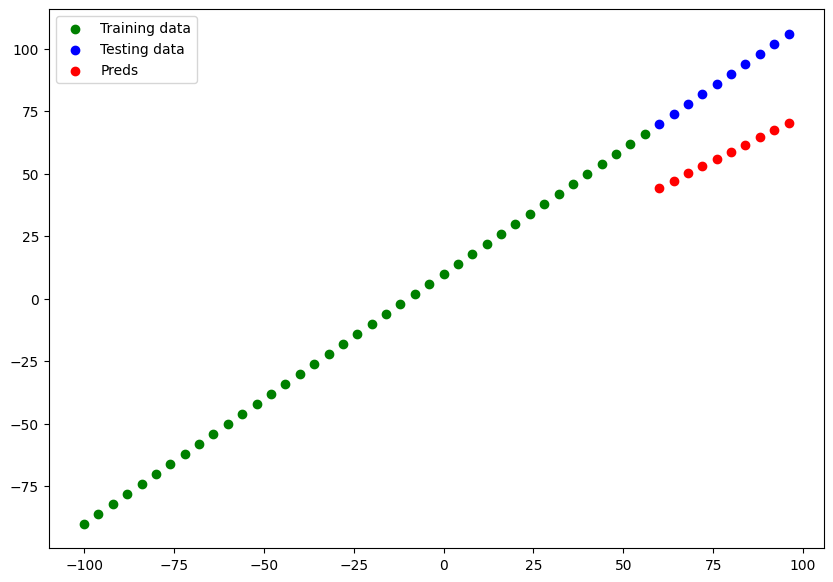

In [85]:
pred1 = model1.predict(xte)
pltp(predictions=pred1)

In [86]:
mae1 = mae(yte, pred1)
mse1 = mse(yte, pred1)

In [87]:
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.622004>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.1141>)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [88]:
tf.random.set_seed(42)
#Model2
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= tf.keras.metrics.mae)



In [89]:
model2.fit(tf.expand_dims(xtr, axis=-1) , ytr, epochs=100, verbose=0)

In [90]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
pred2= model2.predict(xte)

1/1 [==============================] - 0s 63ms/step


In [92]:
pred2.shape, pred2.ndim

((10, 1), 2)

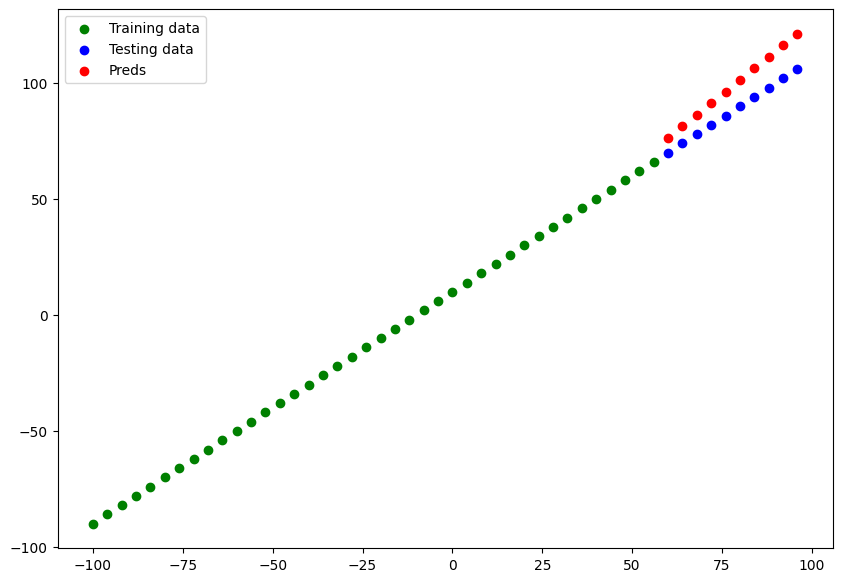

In [93]:

pltp(predictions=pred2)

In [94]:
# Evaluation
mae_2 = mae(yte, pred2)
mse_2 = mse(yte,pred2)

In [95]:
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.837027>,
 <tf.Tensor: shape=(), dtype=float32, numpy=125.34072>)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [96]:
# model3
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics= tf.keras.metrics.mae
)

model3.fit(tf.expand_dims(xtr, axis=-1), ytr, epochs=500, verbose=0)

1/1 [==============================] - 0s 80ms/step


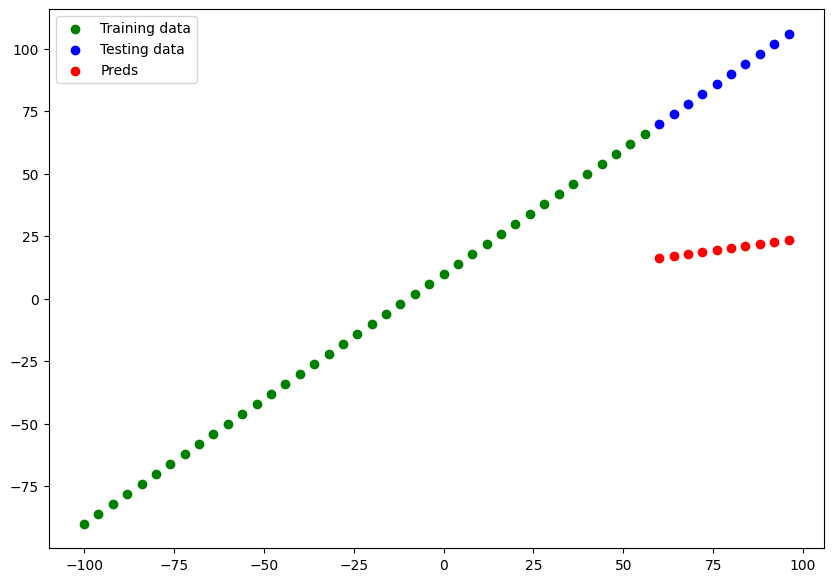

In [97]:
pred3 = model3.predict(xte)
pltp(predictions = pred3)

In [98]:
mae3 = mae(yte, pred3)
mse3 = mse(yte, pred3)

In [99]:
mse3, mae3

(<tf.Tensor: shape=(), dtype=float32, numpy=4704.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=67.97008>)

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [100]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae1.numpy(), mse1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae3.numpy(), mse3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.622004,948.114075
1,model_2,10.837027,125.340721
2,model_3,67.970078,4704.500000


In [101]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://www.wandb.com/) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [102]:
# Save a model using the savemodel format
model2.save("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_regression/models" )

In [103]:
model2.save("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_regression/h5/h5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
## Loading saved model
saved_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_regression/h5/h5.h5")
saved_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# Compare model 2 predictions with saved model prediction
# smp = saved model predictions
smp= saved_model.predict(xte)

1/1 [==============================] - 0s 58ms/step


In [107]:
pred2==  smp

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [108]:
mae(yte,y_preds=pred2) == mae(yte,y_preds=pred2)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [109]:
mse(yte,y_preds=pred2) == mse(yte,y_preds=pred2)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [110]:
def test_imported_model(old_model, imported_model, test_features,test_label):
  """
  A fucntion that tests imported model.
  old_model = previous model,
  imported_model= saved_model,
   test_features = input test data,
   test_label = output test data
  """
  summary_old = old_model.summary()
  summary_imported= imported_model.summary()
  omp = old_model.predict(test_features)
  imp = imported_model.predict(test_features)
  mse_old = tf.keras.metrics.mse(test_label, tf.squeeze(omp))
  mse_imported = tf.keras.metrics.mse(test_label, tf.squeeze(imp))
  mae_old = tf.keras.metrics.mae(test_label, tf.squeeze(omp))
  mae_imported = tf.keras.metrics.mae(test_label, tf.squeeze(imp))

  result = [["summary", summary_old, summary_imported],
            ["mse", mse_old.numpy(), mse_imported.numpy()],
            ["mae", mae_old.numpy(), mae_imported.numpy()]]
  final_result = pd.DataFrame(result, columns=["Details", "Old Model", "New Model"])
  return final_result


In [111]:
test_imported_model(old_model=model2, imported_model=saved_model, test_features=xte,test_label=yte)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                20        
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                            

,Details,Old Model,New Model
0,summary,NaN,NaN
1,mse,125.340721,125.340721
2,mae,10.837027,10.837027


## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [112]:
# from google.colab import files
# files.downloaded("/content/drive/MyDrive/Colab Notebooks/Tensorflow/neural_network_regression/h5/h5.h5")

In [113]:
xtr, ytr

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

--------------------------------------------------------------------------------
                                                                                    Basic Notebook

# A larger example

In [114]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
# Read in the insurence dataset
# ins = insurence
ins = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [116]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [117]:
# One hot encoding
# din = insurence with dummies
din = pd.get_dummies(ins)
din.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [118]:
# din["age"] = din["age"].astype(np.int32)
# din["children"] = din["children"].astype(np.int32)
# din["charges"] = din["charges"].astype(np.float32)
# din["bmi"] = din["bmi"].astype(np.float32)

In [119]:
din = din.astype(np.float32)

In [120]:
din.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900000,0.0,16884.923828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18.0,33.770000,1.0,1725.552246,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,33.000000,3.0,4449.461914,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33.0,22.705000,0.0,21984.470703,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,28.879999,0.0,3866.855225,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [121]:
din.dtypes

age                 float32
bmi                 float32
children            float32
charges             float32
sex_female          float32
sex_male            float32
smoker_no           float32
smoker_yes          float32
region_northeast    float32
region_northwest    float32
region_southeast    float32
region_southwest    float32
dtype: object

Now we'll split data into features (`X`) and labels (`y`).

In [122]:
x = din.drop("charges", axis=1)
y = din.charges

In [123]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x, y , test_size=0.2, random_state=42)


In [124]:
xtr.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46.0,19.950001,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1285,47.0,24.320000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1142,52.0,24.860001,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
969,39.0,34.320000,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
486,54.0,21.469999,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [125]:
tf.random.set_seed(42)

reg1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="Hidden"),
    tf.keras.layers.Dense(1, name= "Output")
])

reg1.compile(loss= tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            metrics= ["mae"])

reg1.fit(xtr, ytr, epochs=100, verbose=0)

In [126]:
tf.random.set_seed(42)

reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="Input"),
    tf.keras.layers.Dense(10, name="Hidden"),
    tf.keras.layers.Dense(1, name= "Output")
])

reg2.compile(loss= tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
            metrics= ["mae"])

reg2.fit(xtr, ytr, epochs=100, verbose=0)

In [127]:
# Check the results of the insurance model
reg2.evaluate(xte,yte)

9/9 [==============================] - 0s 2ms/step - loss: 3159.2927 - mae: 3159.2927


[3159.292724609375, 3159.292724609375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).

Everything else will stay the same.

In [128]:
tf.random.set_seed(42)

reg3 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, name="Input"),
    tf.keras.layers.Dense(150, name="Hidden"),
    tf.keras.layers.Dense(1, name= "Output")
])

reg3.compile(loss= tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
            metrics= ["mae"])

record = reg3.fit(xtr, ytr, epochs=200, verbose=0)

In [129]:
# Check the results of the insurance model
eval3 = reg3.evaluate(xte,yte)

9/9 [==============================] - 0s 2ms/step - loss: 3165.5583 - mae: 3165.5583


Text(0, 0.5, 'loss')

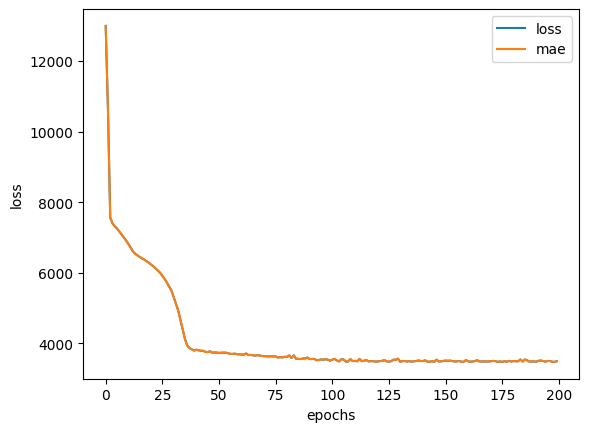

In [130]:
pd.DataFrame(record.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

<Axes: ylabel='Frequency'>

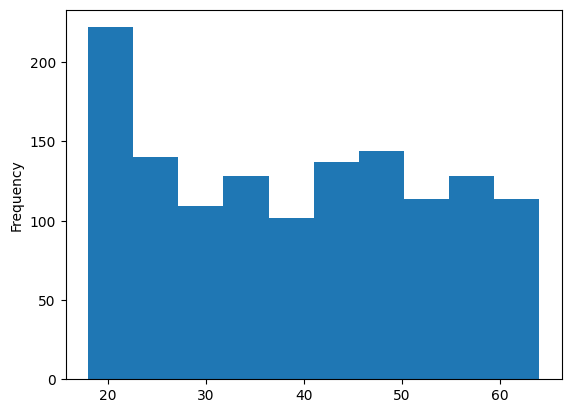

In [131]:
x["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

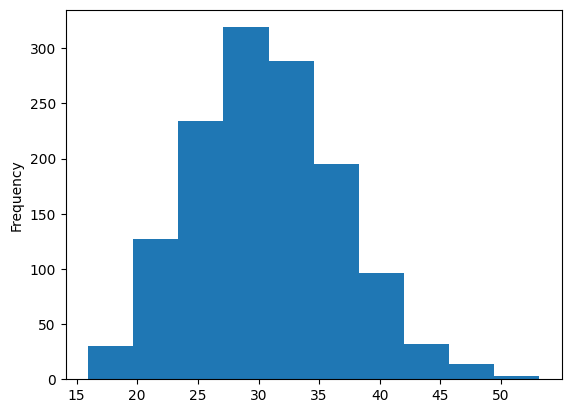

In [132]:
x["bmi"].plot(kind="hist")

In [133]:
x["children"].value_counts()

children
0.0    574
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: count, dtype: int64

In [134]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [135]:
# Read in the insurence dataset
# ins = insurence
ins2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
ins2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [136]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
x= ins2.drop("charges", axis=1)
y = ins2.charges

# Create split
xtr, xte,ytr, yte = train_test_split(x,y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(xtr)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
# xtrn = x_train_normalized
# xten = x_test_normalized
xtrn = ct.transform(xtr)
xten = ct.transform(xte)

In [137]:
xtr.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [138]:
xtr.shape, xtrn.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [139]:
tf.random.set_seed(42)

reg4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

reg4.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])
reg4.fit(xtrn, ytr, epochs= 100, verbose=0)

In [140]:
reg4.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 100)               1200      
                                                                 
 dense_40 (Dense)            (None, 10)                1010      
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
reg4.evaluate(xten, yte)

9/9 [==============================] - 0s 2ms/step - loss: 3181.0005 - mae: 3181.0005


[3181.00048828125, 3181.00048828125]

In [146]:
tf.random.set_seed(42)

reg5 = tf.keras.Sequential([
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1),
])

reg5.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics = ["mae"])
reg5.fit(xtrn, ytr, epochs= 150, verbose=0)

In [147]:
reg5.evaluate(xten, yte)

9/9 [==============================] - 0s 3ms/step - loss: 2836.0806 - mae: 2836.0806


[2836.08056640625, 2836.08056640625]



---

                                                                          End